# Taller 7 - Clasificación con Redes Neuronales

Laura Calderón\
Daniela Espinosa

In [492]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LeakyReLU
from tensorflow.keras.optimizers import Adam, RMSprop, SGD

In [493]:
df = pd.read_csv('heart.csv')

### Análisis de Datos

In [494]:
# Verificar duplicados
duplicados = df.duplicated().sum()
print(f'Duplicados: {duplicados}')

Duplicados: 0


In [495]:
# Identificar valores faltantes
faltantes = df.isnull().sum()
print('Valores faltantes por columna:')
print(faltantes)

Valores faltantes por columna:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [496]:
# Revisar las columnas que son categóricas para convertirlas en el tipo adecuado
print('Tipos de datos originales:')
df.dtypes

Tipos de datos originales:


age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal         object
target        int64
dtype: object

In [497]:
# Resumen estadístico
print('Resumen estadístico:')
df.describe()

Resumen estadístico:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.594059,0.676568,3.108911,131.785479,246.547855,0.148515,0.990099,149.194719,0.326733,1.057756,1.590759,0.683168,0.273927
std,9.016370,0.468560,1.028414,17.748338,52.175933,0.356198,0.988293,23.173368,0.469794,1.165025,0.617767,0.937773,0.446710
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,152.000000,0.000000,0.800000,2.000000,0.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,165.500000,1.000000,1.600000,2.000000,1.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,1.000000


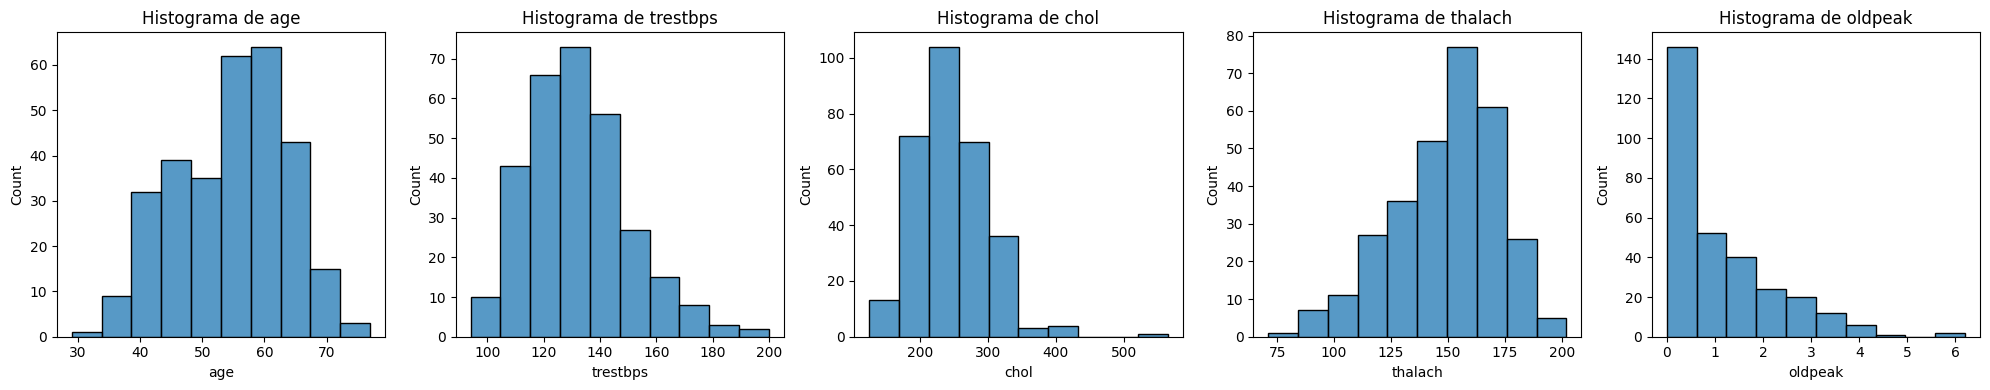

In [498]:
num_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']  

# Gráficos para variables numéricas
plt.figure(figsize=(20, 4)) 
for i, feature in enumerate(num_features):
    plt.subplot(1, 5, i+1)  # filas, columnas
    sns.histplot(data=df, x=feature, kde=False, bins=10)
    plt.title(f'Histograma de {feature}')
    plt.tight_layout()
plt.show()

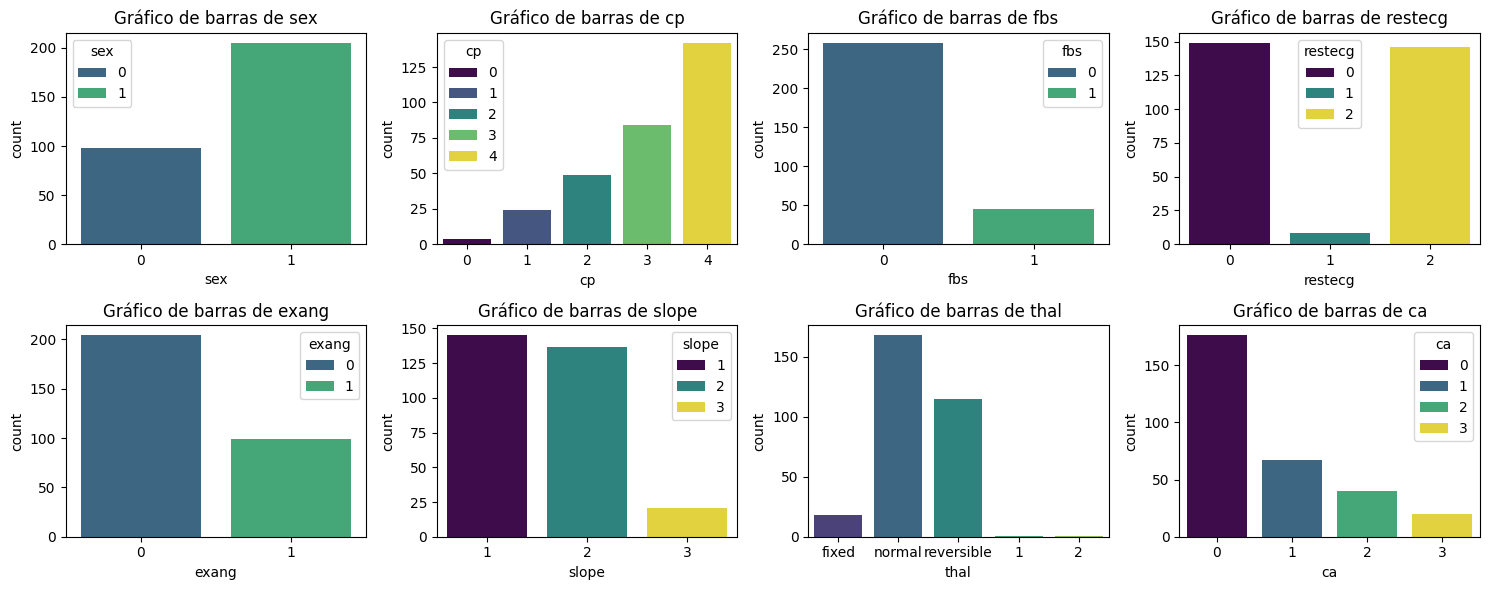

In [499]:
cat_features = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal','ca']

# Gráficos para variables categporicas
plt.figure(figsize=(15, 6)) 
for i, feature in enumerate(cat_features):
    plt.subplot(2, 4, i+1)
    sns.countplot(data=df, x=feature, palette='viridis', hue=feature)
    plt.title(f'Gráfico de barras de {feature}')
    plt.tight_layout()
plt.show()

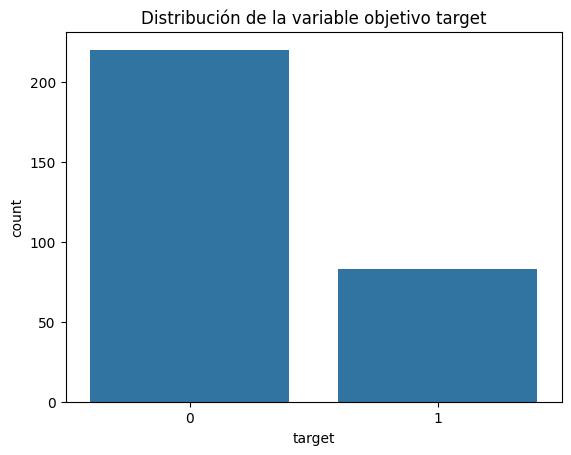

In [500]:
# Comportamiento de la variable objetivo
sns.countplot(x='target', data=df)
plt.title("Distribución de la variable objetivo target")
plt.show()

### Limpieza de Datos

In [501]:
clean_data = df.copy()

In [502]:
# Eliminar datos atípicos de thal y de cp
clean_data = clean_data[(clean_data['thal'] != '1') & (clean_data['thal'] != '2')]
clean_data = clean_data[clean_data['cp'] != 0]

Text(0.5, 1.0, 'Coeficientes de correlación X vs Y')

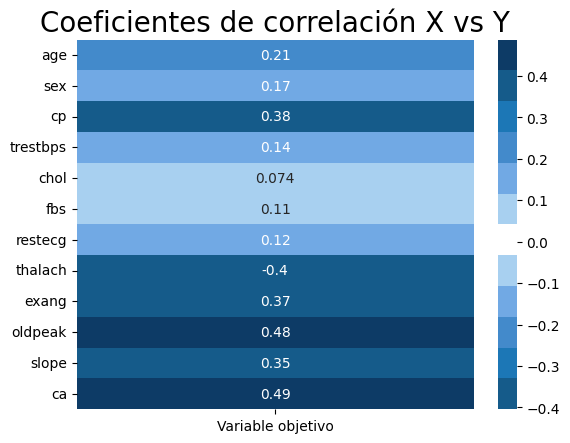

In [503]:
palette_blue_divergent = ["#155B8A", "#1C77B6", "#438ACB",  "#71A9E4", 
                        "#A8D0F0",  "#FFFFFF",  "#A8D0F0", "#71A9E4", "#438ACB", 
                        "#1C77B6", "#155B8A", "#0D3B66" ]

corrw = clean_data.drop('target', axis=1).corrwith(clean_data['target'], numeric_only= True)
sns.heatmap(pd.DataFrame(corrw), cmap=palette_blue_divergent, annot=True, xticklabels=["Variable objetivo"])
plt.title('Coeficientes de correlación X vs Y', fontsize=20)

In [504]:
# Variables con 3+ categorías sin relación numérica
columns_to_encode = ['cp', 'restecg', 'slope', 'thal']
clean_data = pd.get_dummies(clean_data, columns=columns_to_encode, drop_first=True, dtype=int)
pd.set_option('display.max_columns', None)
clean_data.head()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,ca,target,cp_2,cp_3,cp_4,restecg_1,restecg_2,slope_2,slope_3,thal_normal,thal_reversible
0,63,1,145,233,1,150,0,2.3,0,0,0,0,0,0,1,0,1,0,0
1,67,1,160,286,0,108,1,1.5,3,1,0,0,1,0,1,1,0,1,0
2,67,1,120,229,0,129,1,2.6,2,0,0,0,1,0,1,1,0,0,1
3,37,1,130,250,0,187,0,3.5,0,0,0,1,0,0,0,0,1,1,0
4,41,0,130,204,0,172,0,1.4,0,0,1,0,0,0,1,0,0,1,0


## 1. Crear nuevo modelo

Seleccionar subconjunto de las características según su correlación con la variable objetivo:

In [505]:
clean_data = clean_data.drop(columns=['chol','fbs'])

In [506]:
num_features = ['age', 'trestbps', 'thalach', 'oldpeak']

In [507]:
# Escalar los datos
minmax_scaler = MinMaxScaler()
clean_data[num_features] = minmax_scaler.fit_transform(clean_data[num_features])

Modelo (Adam, LR = 0.001, ReLU, 2 capas, 16 y 8 neuronas)

In [508]:
# Separar características (X) y etiquetas (y)
X = clean_data.drop(columns='target')
y = clean_data['target']

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo de red neuronal
model = Sequential()
model.add(Dense(16, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid')) 

# Compilar el modelo
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

c:\Users\danie\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## 2. Entrenar nuevo modelo

Epoch 1/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 6s 170ms/step - accuracy: 0.2972 - loss: 0.8445 - val_accuracy: 0.2292 - val_loss: 0.8289
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.2890 - loss: 0.8220 - val_accuracy: 0.2500 - val_loss: 0.7875
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.3374 - loss: 0.7768 - val_accuracy: 0.2708 - val_loss: 0.7532
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.2847 - loss: 0.7730 - val_accuracy: 0.3333 - val_loss: 0.7251
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.4376 - loss: 0.6987 - val_accuracy: 0.4167 - val_loss: 0.7023
Epoch 6/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.4392 - loss: 0.7199 - val_accuracy: 0.5208 - val_loss: 0.6820
Epoch 7/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.5745 - loss: 0.6747 - val_accuracy: 0.5833 - val_loss: 0.6645
Epoch 8/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.6332 - loss: 0.6604 - val_accuracy: 0.6875 - val_loss: 0.6486

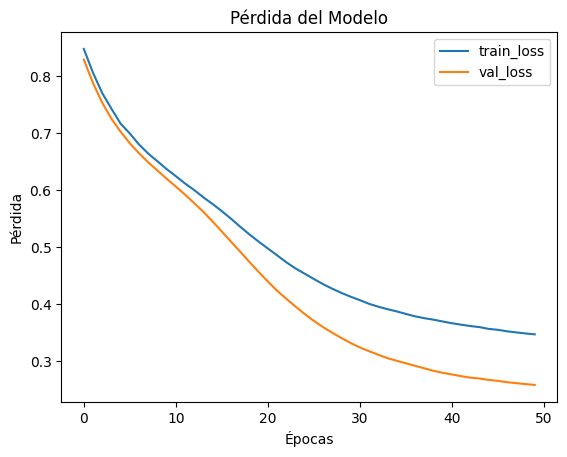

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
Accuracy: 0.8833333333333333
Precision: 0.8461538461538461
Recall: 0.6875
F1 Score: 0.7586206896551724


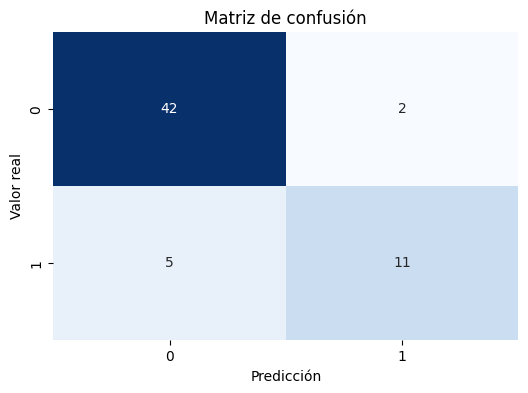

In [509]:
# Entrenar el modelo
history = model.fit(X_train, y_train, epochs=50, validation_split=0.2)

# Graficar la pérdida de entrenamiento y validación
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Pérdida del Modelo')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.show()

# Hacer predicciones en el conjunto de prueba
y_pred = model.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype("int32")

# Calcular y mostrar las métricas de rendimiento
print(f'Accuracy: {accuracy_score(y_test, y_pred_classes)}')
print(f'Precision: {precision_score(y_test, y_pred_classes)}')
print(f'Recall: {recall_score(y_test, y_pred_classes)}')
print(f'F1 Score: {f1_score(y_test, y_pred_classes)}')

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title(f"Matriz de confusión")
plt.ylabel('Valor real')
plt.xlabel('Predicción')
plt.show()

## Modificaciones de los modelos

In [510]:
# Lista de configuraciones de modelos
configuraciones = [
    
    # Original
    {
        'nombre': 'Default Adam',
        'optimizer': 'adam',
        'learning_rate': 0.001,
        'neurons': [16, 8],
        'activations': ['relu', 'relu'],
        'additional_layers': None
    },
    
    # --------------------------------------
    # 3. Modificar el optimizador empleado
    # --------------------------------------
    
    # 3.1. RMSprop
    {
        'nombre': 'RMSprop',
        'optimizer': 'rmsprop',
        'learning_rate': 0.001,
        'neurons': [16, 8],
        'activations': ['relu', 'relu'],
        'additional_layers': None
    },

    # 3.2. SGD
    {
        'nombre': 'SGD',
        'optimizer': 'sgd',
        'learning_rate': 0.01,
        'neurons': [16, 8],
        'activations': ['relu', 'relu'],
        'additional_layers': None
    },
    
    # -----------------------------------------------------
    # 4. Modificar la tasa de aprendizaje del optimizador
    # -----------------------------------------------------

    # 4.1 LR=0.0001
    {
        'nombre': 'Adam LR=0.0001',
        'optimizer': 'adam',
        'learning_rate': 0.0001,
        'neurons': [16, 8],
        'activations': ['relu', 'relu'],
        'additional_layers': None
    },

    # 4.2 LR=0.005
    {
        'nombre': 'Adam LR=0.005',
        'optimizer': 'adam',
        'learning_rate': 0.005,
        'neurons': [16, 8],
        'activations': ['relu', 'relu'],
        'additional_layers': None
    },

    # 4.2 LR=0.01
    {
        'nombre': 'Adam LR=0.01',
        'optimizer': 'adam',
        'learning_rate': 0.01,
        'neurons': [16, 8],
        'activations': ['relu', 'relu'],
        'additional_layers': None
    },

    # -----------------------------------
    # 5. Modificar el número de neuronas
    # -----------------------------------

    # 5.1. 8 y 4 neuronas
    {
        'nombre': 'Menos Neuronas',
        'optimizer': 'adam',
        'learning_rate': 0.001,
        'neurons': [8, 4],
        'activations': ['relu', 'relu'],
        'additional_layers': None
    },

    # 5.2. 32 y 16 neuronas
    {
        'nombre': 'Más Neuronas',
        'optimizer': 'adam',
        'learning_rate': 0.001,
        'neurons': [32, 16],
        'activations': ['relu', 'relu'],
        'additional_layers': None
    },

    # 5.3. 64 y 32 neuronas
    {
        'nombre': 'Muchas Neuronas',
        'optimizer': 'adam',
        'learning_rate': 0.001,
        'neurons': [64, 32],
        'activations': ['relu', 'relu'],
        'additional_layers': None
    },

    # -------------------------------
    # 6. Modificar el número de capas
    # -------------------------------

    # 6.1. 1 capa oculta
    {
        'nombre': 'Una Capa Oculta',
        'optimizer': 'adam',
        'learning_rate': 0.001,
        'neurons': [16],
        'activations': ['relu'],
        'additional_layers': None
    },

    # 6.2. 3 capas ocultas
    {
        'nombre': 'Tres Capas Ocultas',
        'optimizer': 'adam',
        'learning_rate': 0.001,
        'neurons': [16, 8, 4],
        'activations': ['relu', 'relu', 'relu'],
        'additional_layers': None
    },

    # 6.3. 4 capas ocultas
    {
        'nombre': 'Cuatro Capas Ocultas',
        'optimizer': 'adam',
        'learning_rate': 0.001,
        'neurons': [32, 16, 8, 4],
        'activations': ['relu', 'relu', 'relu', 'relu'],
        'additional_layers': None
    },
    
    # ----------------------------------------- 
    # 7. Modifique las funciones de activación
    # ----------------------------------------- 

    # 7.1. Función de activación tanh 
    {
        'nombre': 'Funciones Tanh',
        'optimizer': 'adam',
        'learning_rate': 0.001,
        'neurons': [16, 8],
        'activations': ['tanh', 'tanh'],
        'additional_layers': None
    },

    # 7.2. Función de activación sigmoid 
    {
        'nombre': 'Funciones Sigmoid',
        'optimizer': 'adam',
        'learning_rate': 0.001,
        'neurons': [16, 8],
        'activations': ['sigmoid', 'sigmoid'],
        'additional_layers': None
    },

    # 7.3. Función de activación Leaky ReLU 
    {
        'nombre': 'Funciones Leaky ReLU',
        'optimizer': 'adam',
        'learning_rate': 0.001,
        'neurons': [16, 8],
        'activations': [None, None],
        'additional_layers': [
            {'neurons': 16, 'activation_fn': 'leaky_relu', 'activation_fn_alpha': 0.1},
            {'neurons': 8, 'activation_fn': 'leaky_relu', 'activation_fn_alpha': 0.1}
        ]
    }
]

In [511]:
def crear_modelo(optimizer='adam', learning_rate=0.001, neurons=[16, 8], activations=['relu', 'relu'], additional_layers=None):
    """
    Crea y compila un modelo de red neuronal con las especificaciones dadas.
    
    Parameters:
    - optimizer: String o instancia de optimizador (e.g., 'adam', 'rmsprop', 'sgd').
    - learning_rate: Float, tasa de aprendizaje para el optimizador.
    - neurons: Lista de enteros, número de neuronas en cada capa oculta.
    - activations: Lista de strings o funciones, funciones de activación para cada capa oculta.
    - additional_layers: Lista de diccionarios, capas adicionales con especificaciones.
    
    Returns:
    - model: Modelo compilado de Keras.
    """
    model = Sequential()
    # Añadir capas ocultas
    for i, (n, act) in enumerate(zip(neurons, activations)):
        if i == 0:
            model.add(Dense(n, activation=act, input_shape=(X_train.shape[1],)))
        else:
            model.add(Dense(n, activation=act))
    
    # Añadir capas adicionales si se especifican
    if additional_layers:
        for layer in additional_layers:
            if 'activation' in layer:
                model.add(Dense(layer['neurons'], activation=layer['activation']))
            else:
                model.add(Dense(layer['neurons']))
                if 'activation_fn' in layer:
                    model.add(LeakyReLU(alpha=layer['activation_fn_alpha']))
    
    # Capa de salida
    model.add(Dense(1, activation='sigmoid'))
    
    # Configurar el optimizador con la tasa de aprendizaje especificada
    if isinstance(optimizer, str):
        if optimizer.lower() == 'adam':
            opt = Adam(learning_rate=learning_rate)
        elif optimizer.lower() == 'rmsprop':
            opt = RMSprop(learning_rate=learning_rate)
        elif optimizer.lower() == 'sgd':
            opt = SGD(learning_rate=learning_rate)
        else:
            raise ValueError("Optimizer not supported.")
    else:
        opt = optimizer
    
    # Compilar el modelo
    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
    
    return model


In [512]:
def optimizar_umbral(y_true, y_pred_proba, metric='f1'):
    """
    Optimiza el umbral para maximizar una métrica específica

    """
    mejor_metrica = -1
    mejor_umbral = 0.5
    
    for umbral in np.arange(0.0, 1.0, 0.01):
        y_pred = (y_pred_proba >= umbral).astype(int)
        if metric == 'f1':
            metrica = f1_score(y_true, y_pred)
        elif metric == 'precision':
            metrica = precision_score(y_true, y_pred)
        elif metric == 'recall':
            metrica = recall_score(y_true, y_pred)
            print (metrica)
        else:
            raise ValueError("Métrica no soportada. Elige entre 'f1', 'precision', 'recall'.")
        
        if metrica > mejor_metrica:
            mejor_metrica = metrica
            mejor_umbral = umbral
            
    return mejor_umbral, mejor_metrica


In [513]:
def entrenar_evaluar_modelo(model, X_train, y_train, X_test, y_test, epochs=50, validation_split=0.2, verbose=0, optimizar_threshold=False, metric='f1'):
    """
    Entrena el modelo y evalúa su rendimiento, incluyendo la opción de optimizar el umbral.

    """
    # Entrenar el modelo
    history = model.fit(X_train, y_train, epochs=epochs, validation_split=validation_split, verbose=verbose)
    
    # Graficar la pérdida de entrenamiento y validación
    plt.figure(figsize=(10, 5))
    plt.plot(history.history['loss'], label='train_loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.title('Pérdida del Modelo')
    plt.xlabel('Épocas')
    plt.ylabel('Pérdida')
    plt.legend()
    plt.show()
    
    # Hacer predicciones en el conjunto de prueba
    y_pred_proba = model.predict(X_test).flatten()
    
    if optimizar_threshold:
        # Optimizar el umbral
        mejor_umbral, mejor_metrica = optimizar_umbral(y_test, y_pred_proba, metric=metric)
        print(f'Mejor umbral para {metric}: {mejor_umbral:.2f} con {metric.upper()}: {mejor_metrica:.2f}')
        
        # Aplicar el mejor umbral
        y_pred = (y_pred_proba >= mejor_umbral).astype(int)
    else:
        # Usar umbral predeterminado de 0.5
        mejor_umbral = 0.5
        y_pred = (y_pred_proba >= mejor_umbral).astype(int)
    
    # Calcular las métricas
    metrics_dict = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1 Score': f1_score(y_test, y_pred),
        'Threshold': mejor_umbral
    }
    
    # Mostrar las métricas
    for metric_name, value in metrics_dict.items():
        if metric_name != 'Threshold':
            print(f'{metric_name}: {value:.2f}')
    
    # Matriz de confusión
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title("Matriz de Confusión")
    plt.ylabel('Valor Real')
    plt.xlabel('Predicción')
    plt.show()
    
    return history, metrics_dict, mejor_umbral


In [ ]:
# Diccionario para almacenar resultados
resultados = {}

for config in configuraciones:
    print(f"Entrenando modelo: {config['nombre']}")
    
    # Crear el modelo utilizando la función crear_modelo
    model = crear_modelo(
        optimizer=config['optimizer'],
        learning_rate=config['learning_rate'],
        neurons=config['neurons'],
        activations=config['activations'],
        additional_layers=config['additional_layers']
    )
    
    # Entrenar y evaluar el modelo con optimización del umbral
    history, metrics_dict, mejor_umbral = entrenar_evaluar_modelo(
        model,
        X_train,
        y_train,
        X_test,
        y_test,
        epochs=50,
        validation_split=0.2,
        verbose=0, 
        optimizar_threshold=False,
        metric='f1'
    )
    
    # Almacenar los resultados
    resultados[config['nombre']] = {
        'history': history,
        'metrics': metrics_dict,
        'umbral_optimo': mejor_umbral
    }
    
    print("\n" + "="*50 + "\n")


## 8. Proposición y comparación de 2 modelos diferentes

Entrenando modelo: Default Adam


c:\Users\danie\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


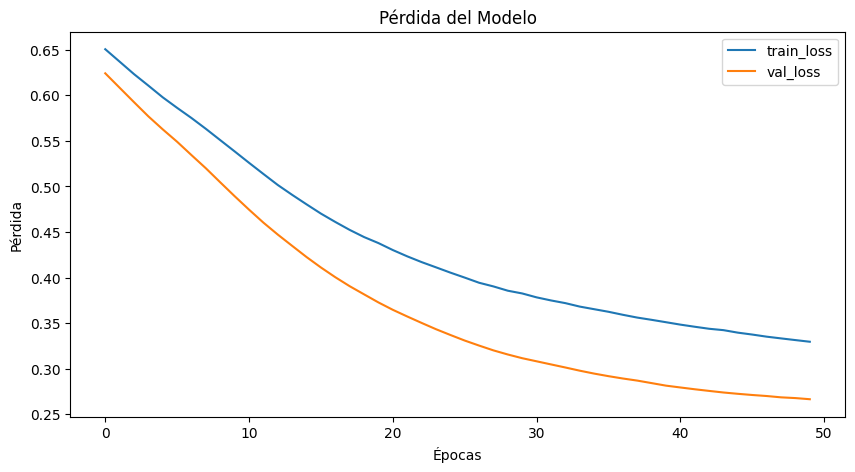

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
Mejor umbral para f1: 0.48 con F1: 0.88
Accuracy: 0.93
Precision: 0.88
Recall: 0.88
F1 Score: 0.88


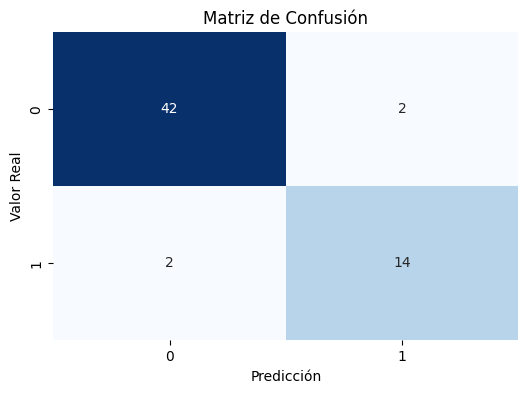



Entrenando modelo: RMSprop


c:\Users\danie\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


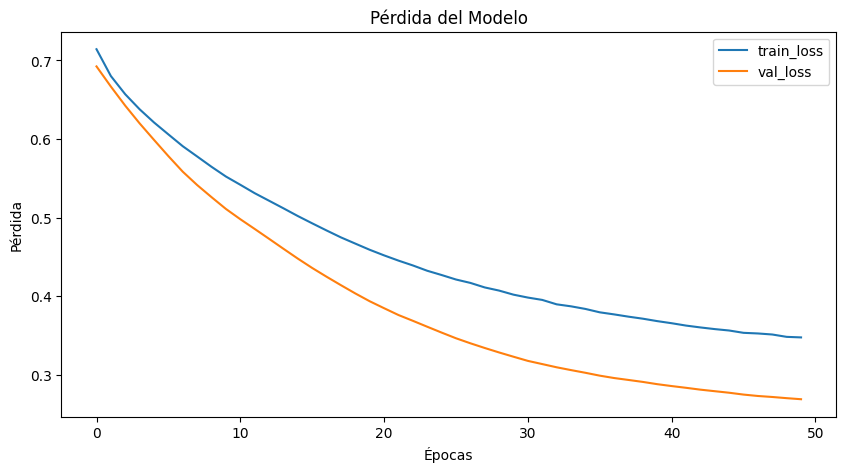

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step
Mejor umbral para f1: 0.39 con F1: 0.85
Accuracy: 0.92
Precision: 0.82
Recall: 0.88
F1 Score: 0.85


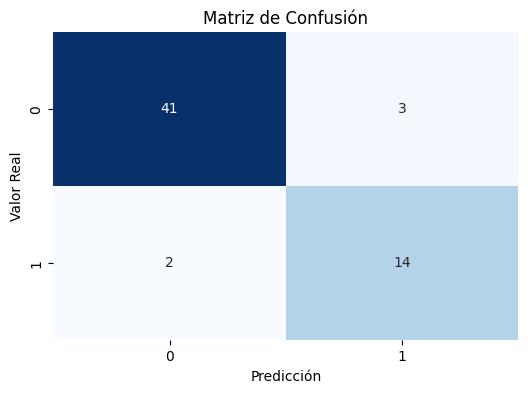



Entrenando modelo: SGD


c:\Users\danie\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


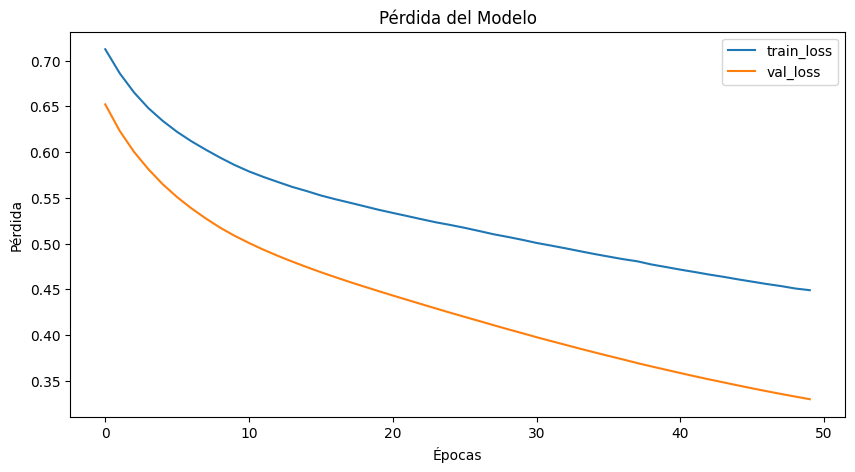

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
Mejor umbral para f1: 0.32 con F1: 0.81
Accuracy: 0.90
Precision: 0.81
Recall: 0.81
F1 Score: 0.81


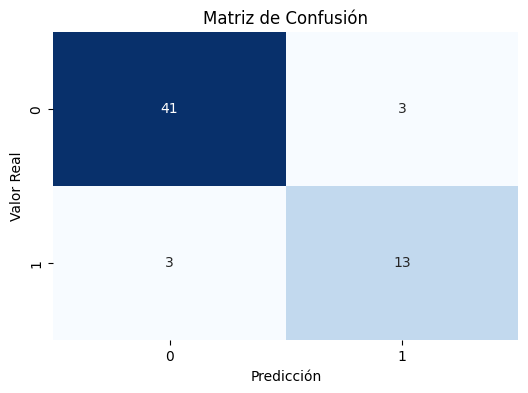



Entrenando modelo: Adam LR=0.0001


c:\Users\danie\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


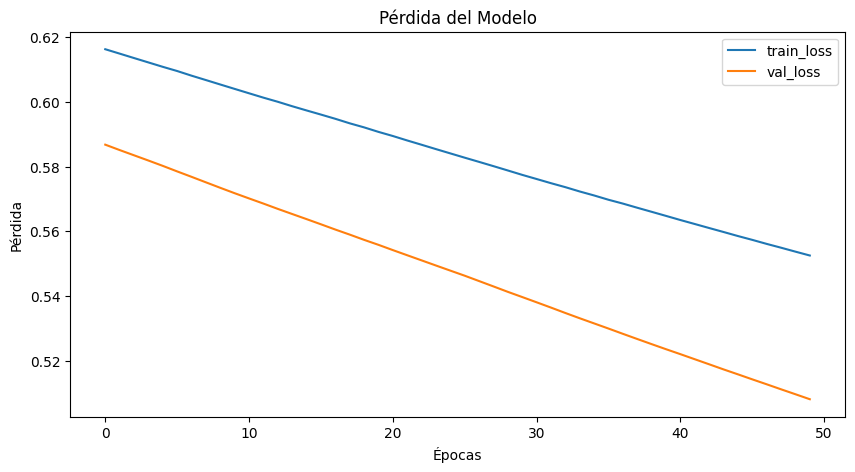

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
Mejor umbral para f1: 0.40 con F1: 0.77
Accuracy: 0.90
Precision: 1.00
Recall: 0.62
F1 Score: 0.77


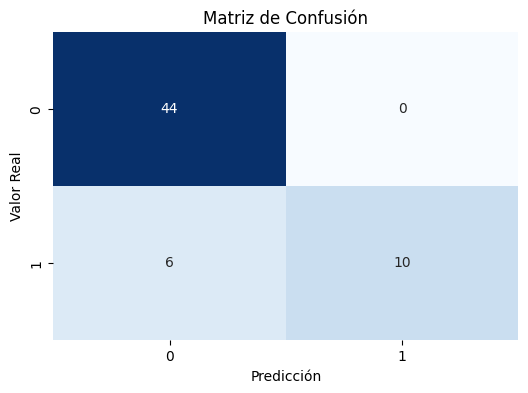



Entrenando modelo: Adam LR=0.005


c:\Users\danie\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


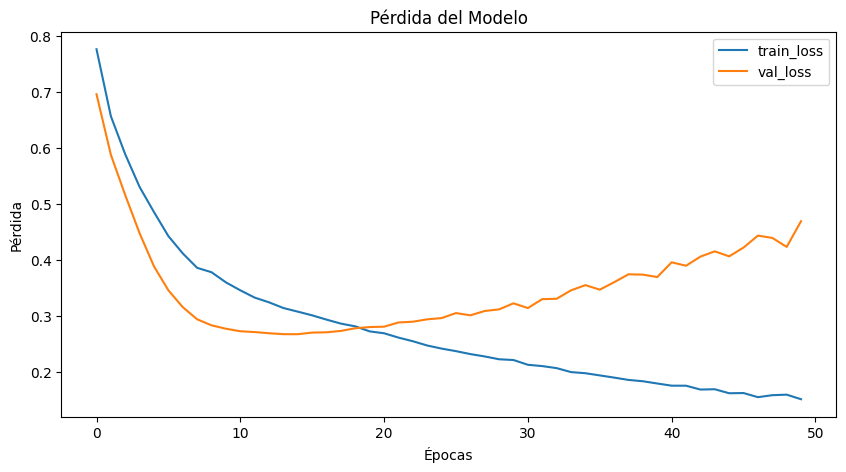

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
Mejor umbral para f1: 0.02 con F1: 0.82
Accuracy: 0.88
Precision: 0.70
Recall: 1.00
F1 Score: 0.82


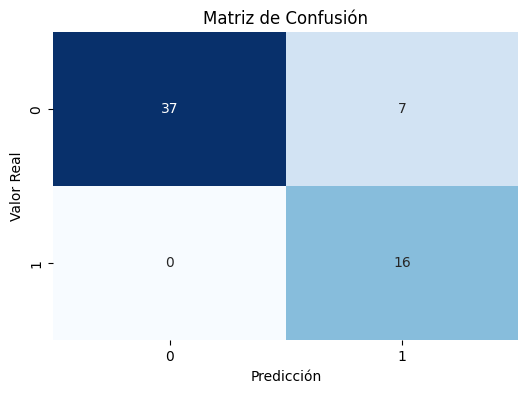



Entrenando modelo: Adam LR=0.01


c:\Users\danie\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


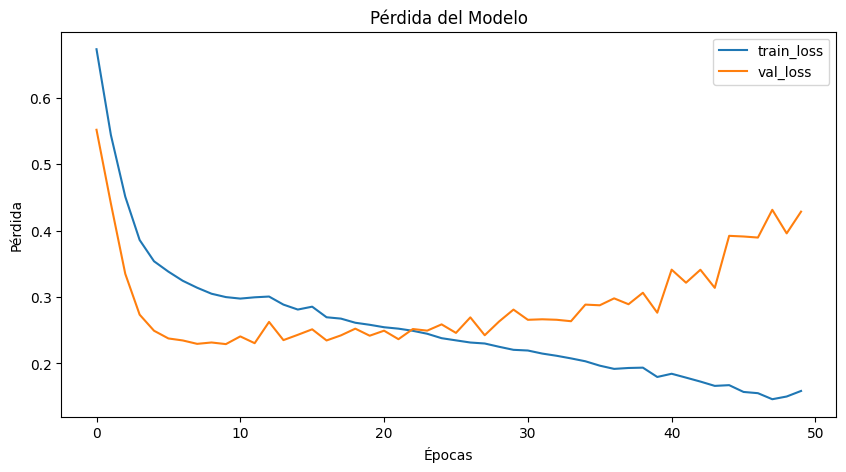

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step
Mejor umbral para f1: 0.46 con F1: 0.84
Accuracy: 0.92
Precision: 0.87
Recall: 0.81
F1 Score: 0.84


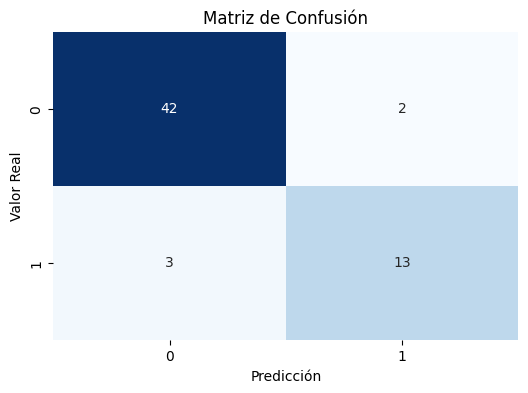



Entrenando modelo: Menos Neuronas


c:\Users\danie\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


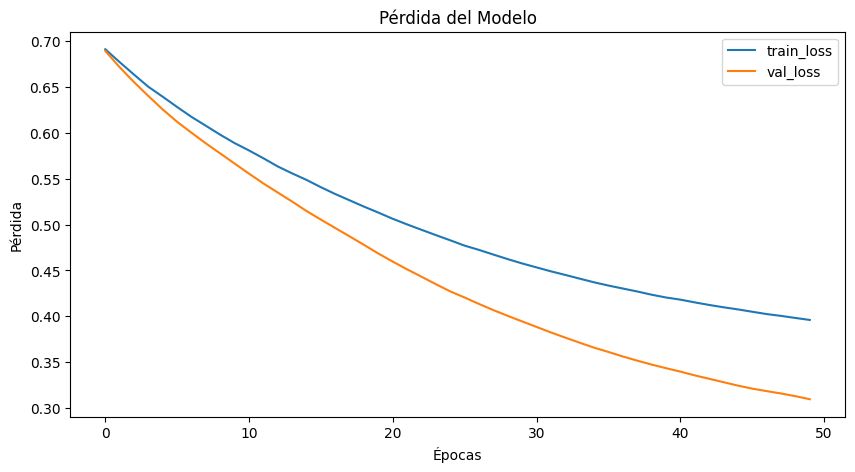

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
Mejor umbral para f1: 0.49 con F1: 0.87
Accuracy: 0.93
Precision: 0.93
Recall: 0.81
F1 Score: 0.87


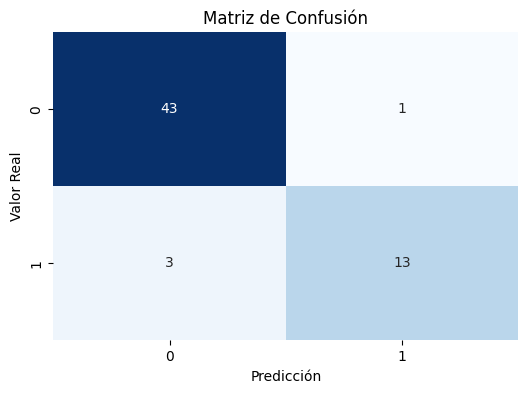



Entrenando modelo: Más Neuronas


c:\Users\danie\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


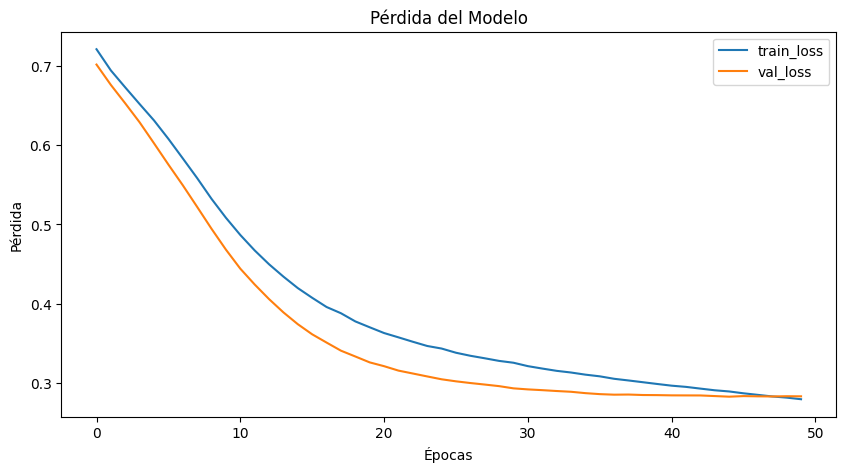

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
Mejor umbral para f1: 0.27 con F1: 0.88
Accuracy: 0.93
Precision: 0.83
Recall: 0.94
F1 Score: 0.88


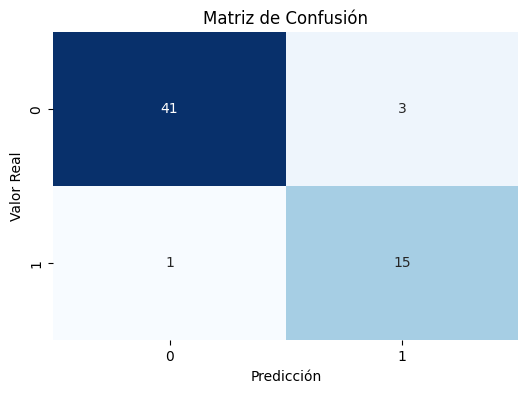



Entrenando modelo: Muchas Neuronas


c:\Users\danie\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


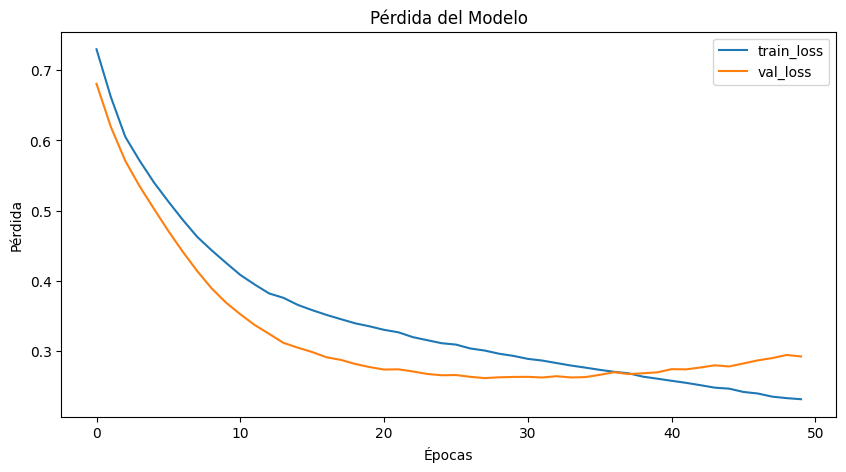

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
Mejor umbral para f1: 0.20 con F1: 0.83
Accuracy: 0.90
Precision: 0.75
Recall: 0.94
F1 Score: 0.83


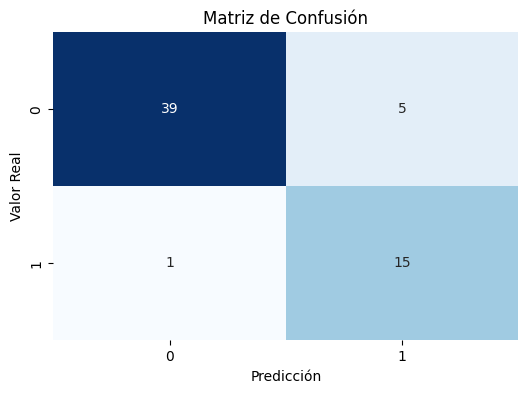



Entrenando modelo: Una Capa Oculta


c:\Users\danie\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


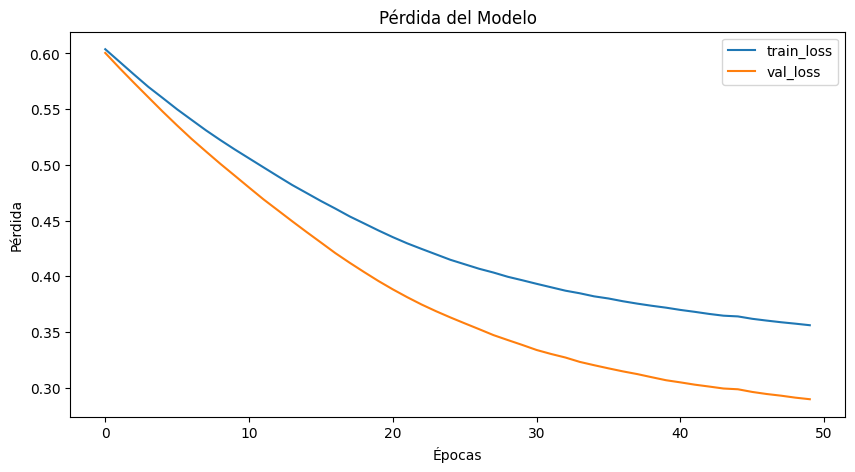

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
Mejor umbral para f1: 0.38 con F1: 0.88
Accuracy: 0.93
Precision: 0.83
Recall: 0.94
F1 Score: 0.88


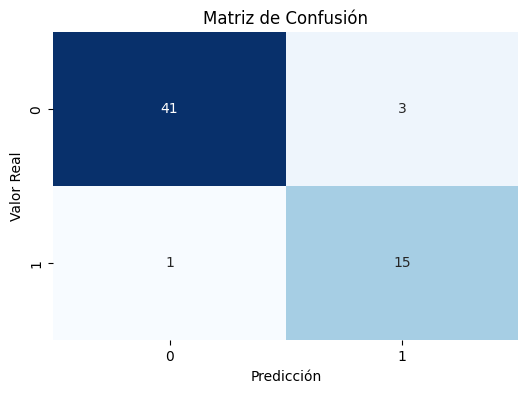



Entrenando modelo: Tres Capas Ocultas


c:\Users\danie\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


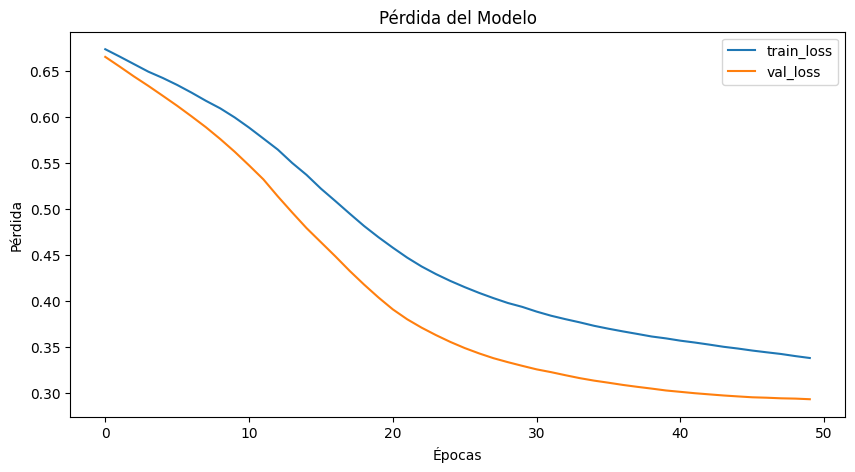

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
Mejor umbral para f1: 0.29 con F1: 0.88
Accuracy: 0.93
Precision: 0.83
Recall: 0.94
F1 Score: 0.88


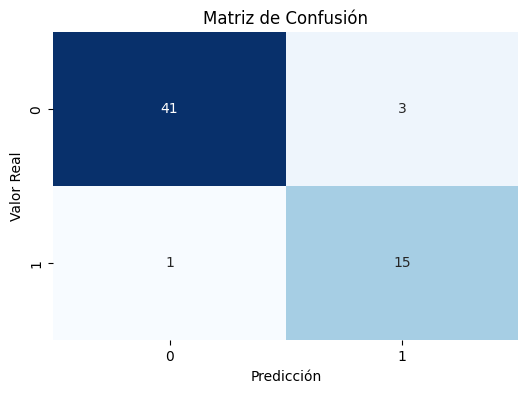



Entrenando modelo: Cuatro Capas Ocultas


c:\Users\danie\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


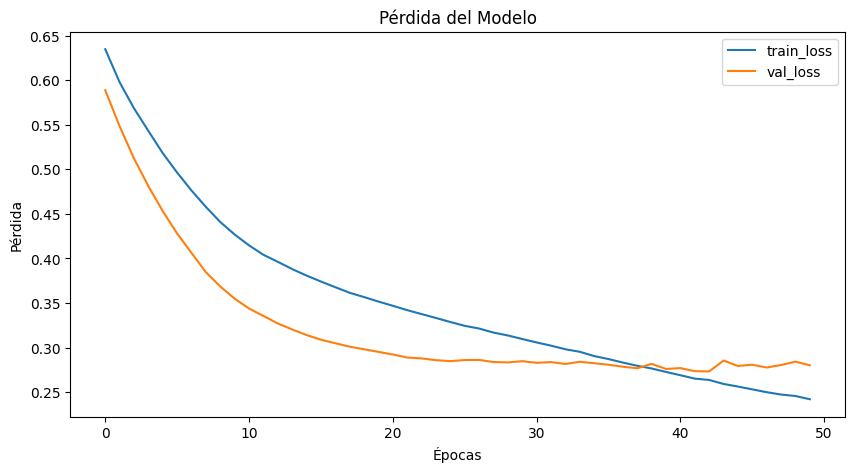

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
Mejor umbral para f1: 0.20 con F1: 0.86
Accuracy: 0.92
Precision: 0.79
Recall: 0.94
F1 Score: 0.86


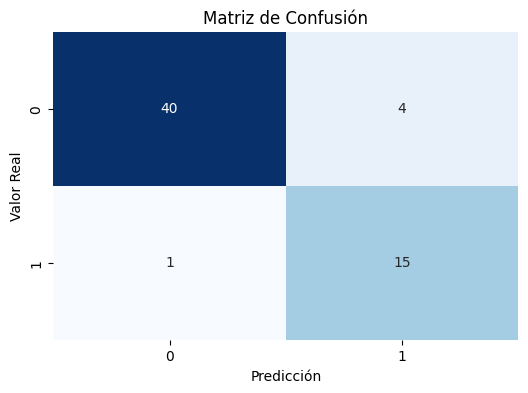



Entrenando modelo: Funciones Tanh


c:\Users\danie\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


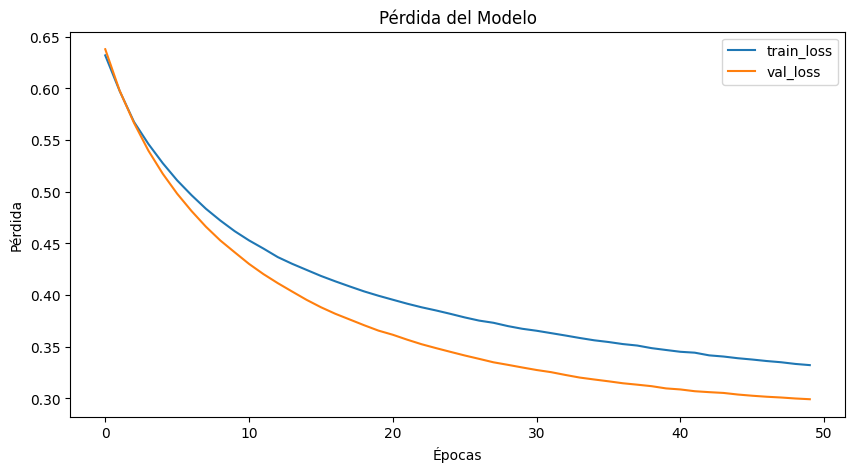

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
Mejor umbral para f1: 0.35 con F1: 0.86
Accuracy: 0.92
Precision: 0.79
Recall: 0.94
F1 Score: 0.86


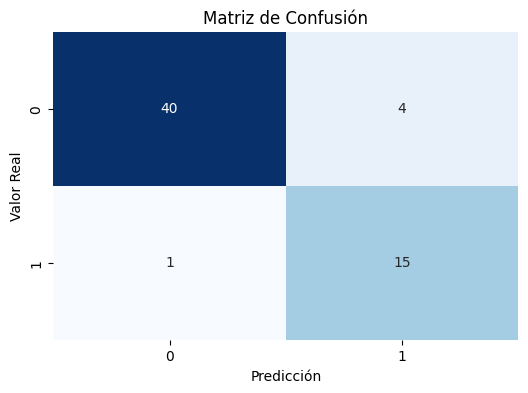



Entrenando modelo: Funciones Sigmoid


c:\Users\danie\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


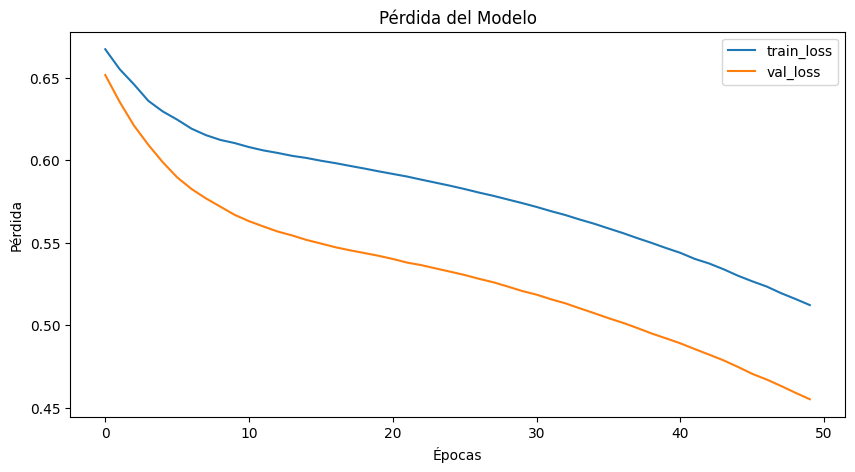

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
Mejor umbral para f1: 0.34 con F1: 0.88
Accuracy: 0.93
Precision: 0.83
Recall: 0.94
F1 Score: 0.88


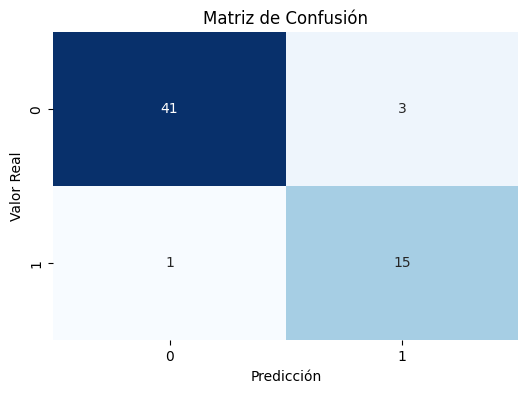



Entrenando modelo: Funciones Leaky ReLU


c:\Users\danie\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\danie\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


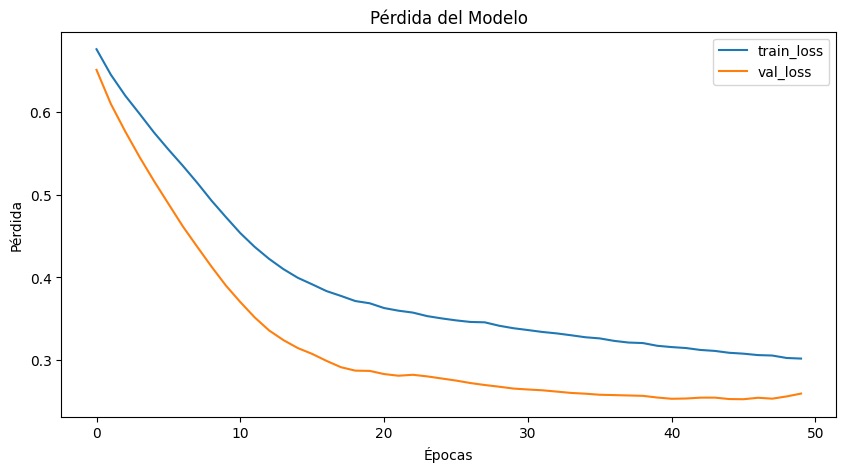

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
Mejor umbral para f1: 0.39 con F1: 0.88
Accuracy: 0.93
Precision: 0.83
Recall: 0.94
F1 Score: 0.88


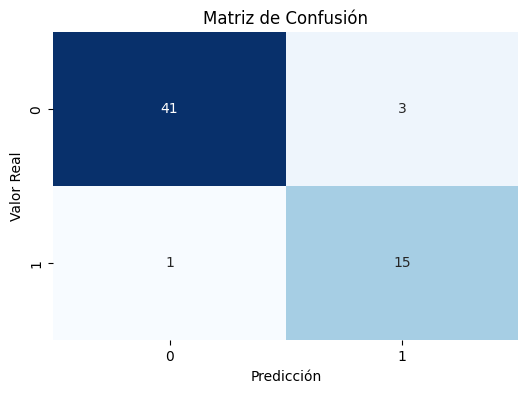

In [514]:
# Diccionario para almacenar resultados
resultados = {}

for config in configuraciones:
    print(f"Entrenando modelo: {config['nombre']}")
    
    # Crear el modelo utilizando la función crear_modelo
    model = crear_modelo(
        optimizer=config['optimizer'],
        learning_rate=config['learning_rate'],
        neurons=config['neurons'],
        activations=config['activations'],
        additional_layers=config['additional_layers']
    )
    
    # Entrenar y evaluar el modelo con optimización del umbral
    history, metrics_dict, mejor_umbral = entrenar_evaluar_modelo(
        model,
        X_train,
        y_train,
        X_test,
        y_test,
        epochs=50,
        validation_split=0.2,
        verbose=0, 
        optimizar_threshold=True,
        metric='f1'
    )
    
    # Almacenar los resultados
    resultados[config['nombre']] = {
        'history': history,
        'metrics': metrics_dict,
        'umbral_optimo': mejor_umbral
    }
    
    print("\n" + "="*50 + "\n")


In [515]:
# Crear un DataFrame para almacenar las métricas
df_resultados = pd.DataFrame(columns=['Modelo', 'Accuracy', 'Precision', 'Recall', 'F1 Score','Threshold'])

for nombre, resultado in resultados.items():
    # Crear un DataFrame temporal para la fila actual
    fila = pd.DataFrame({
        'Modelo': [nombre],
        'Accuracy': [resultado['metrics']['Accuracy']],
        'Precision': [resultado['metrics']['Precision']],
        'Recall': [resultado['metrics']['Recall']],
        'F1 Score': [resultado['metrics']['F1 Score']],
        'Threshold': [resultado['metrics']['Threshold']]
    })
    
    # Concatenar la fila al DataFrame de resultados
    df_resultados = pd.concat([df_resultados, fila], ignore_index=True)

# Ordenar los modelos por F1 Score descendente
df_resultados = df_resultados.sort_values(by='F1 Score', ascending=False).reset_index(drop=True)

# Mostrar los resultados
print(df_resultados)


                  Modelo  Accuracy  Precision  Recall  F1 Score  Threshold
0           Más Neuronas  0.933333   0.833333  0.9375  0.882353       0.27
1        Una Capa Oculta  0.933333   0.833333  0.9375  0.882353       0.38
2     Tres Capas Ocultas  0.933333   0.833333  0.9375  0.882353       0.29
3      Funciones Sigmoid  0.933333   0.833333  0.9375  0.882353       0.34
4   Funciones Leaky ReLU  0.933333   0.833333  0.9375  0.882353       0.39
5           Default Adam  0.933333   0.875000  0.8750  0.875000       0.48
6         Menos Neuronas  0.933333   0.928571  0.8125  0.866667       0.49
7   Cuatro Capas Ocultas  0.916667   0.789474  0.9375  0.857143       0.20
8         Funciones Tanh  0.916667   0.789474  0.9375  0.857143       0.35
9                RMSprop  0.916667   0.823529  0.8750  0.848485       0.39
10          Adam LR=0.01  0.916667   0.866667  0.8125  0.838710       0.46
11       Muchas Neuronas  0.900000   0.750000  0.9375  0.833333       0.20
12         Adam LR=0.005 

C:\Users\danie\AppData\Local\Temp\ipykernel_10576\277107354.py:16: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_resultados = pd.concat([df_resultados, fila], ignore_index=True)


In [516]:
# Seleccionar los dos mejores modelos
mejores_modelos = df_resultados.head(2)
print("\nLos dos mejores modelos son:\n")
mejores_modelos


Los dos mejores modelos son:



,Modelo,Accuracy,Precision,Recall,F1 Score,Threshold
0,Más Neuronas,0.933333,0.833333,0.9375,0.882353,0.27
1,Una Capa Oculta,0.933333,0.833333,0.9375,0.882353,0.38


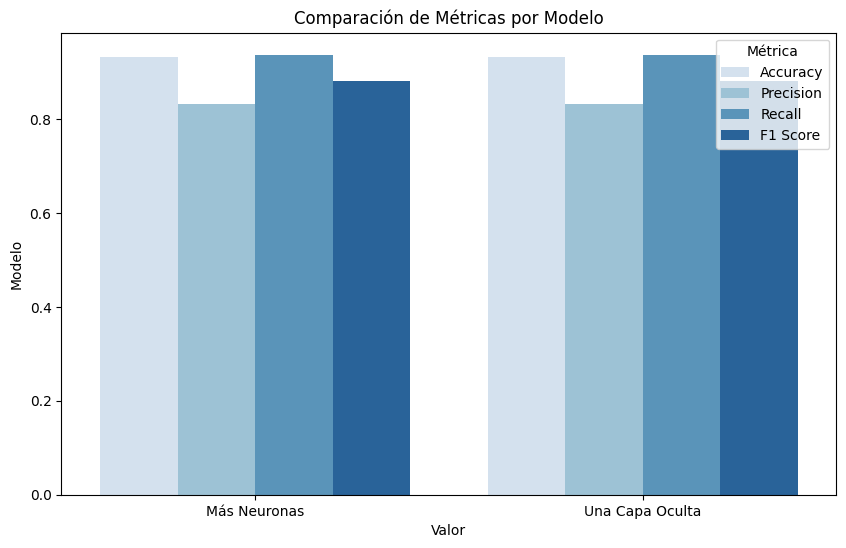

In [517]:
# Melt the DataFrame para facilitar la graficación
df_melted = mejores_modelos.melt(id_vars=['Modelo', 'Threshold'], var_name='Métrica', value_name='Valor')

# Graficar las métricas
plt.figure(figsize=(10, 6))
sns.barplot(x='Modelo', y='Valor', hue='Métrica', data=df_melted, palette='Blues')
plt.title('Comparación de Métricas por Modelo')
plt.xlabel('Valor')
plt.ylabel('Modelo')
plt.legend(title='Métrica')
plt.show()